In [3]:
from __future__ import division

# classic
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os,sys
#import tables
import scipy.stats

# some nice formating things
plt.rc('font', family='serif', size=25)
plt.rc('legend', fontsize=25)
plt.rc('axes', labelsize=25)
plt.rc('axes', titlesize=25)

## Load the HESE neutrino event sample

In [4]:
def loadEvents(filename):
    ID,E,EerrMin,EerrMax,DEC,RA,Anger = np.loadtxt(filename,comments='#',usecols=(0,1,2,3,5,6,7), unpack =True)
    topo = np.loadtxt(filename,comments='#',usecols=[8], unpack =True, dtype = 'str')
    
    array = np.recarray(len(E), [('topology', topo.dtype), # track or shower
                                 ('energy', float), # deposited energy in TeV
                                 ('energy_error', float), # error on deposited energy in TeV
                                 ('RA', float),  # position in right asension (radians)
                                 ('DEC', float), # position in declination (radians)
                                 ('ID', int), # event ID
                                 ('angular_error', float)]) # angular error on position in radians
    array.ID[:] = ID
    array.topology[:] = topo
    array.energy[:], array.energy_error[:] = E, np.array([EerrMin, EerrMax]).max(axis=0)
    array.RA[:], array.DEC[:], array.angular_error[:] = np.radians(RA), np.radians(DEC), np.radians(Anger)
    
    return array

HESEEvents=loadEvents("data/eventsummary_4years.txt")

## Display information for all HESE events

In [5]:
print(HESEEvents.dtype.names)
print(HESEEvents)

('topology', 'energy', 'energy_error', 'RA', 'DEC', 'ID', 'angular_error')
[('Shower',   47.6,   6.5, 0.6143559 , -0.03141593,  1, 0.28448867)
 ('Shower',  117. ,  15.4, 4.93230047, -0.48869219,  2, 0.44331363)
 ('Track',   78.7,  10.8, 2.23227611, -0.54454273,  3, 0.02443461)
 ('Shower',  165.4,  19.8, 2.95833308, -0.89360858,  4, 0.12391838)
 ('Track',   71.4,   9. , 1.93033415, -0.00698132,  5, 0.02094395)
 ('Shower',   28.4,   2.7, 2.33699587, -0.47472956,  6, 0.17104227)
 ('Shower',   34.3,   3.5, 0.27227136, -0.78714349,  7, 0.42062435)
 ('Track',   32.6,  10.3, 3.18348056, -0.3700098 ,  8, 0.02268928)
 ('Shower',   63.2,   7.1, 2.64068316,  0.58643063,  9, 0.28797933)
 ('Shower',   97.2,  10.4, 0.08726646, -0.5131268 , 10, 0.14137167)
 ('Shower',   88.4,  12.5, 2.71049633, -0.1553343 , 11, 0.29146999)
 ('Shower',  104.1,  12.5, 5.16791992, -0.92153385, 12, 0.17104227)
 ('Track',  252.7,  25.9, 1.18507856,  0.70336769, 13, 0.02094395)
 ('Shower', 1040.7, 131.6, 4.63559449, -0.486

## Load a catalog

In [12]:
def loadCatalog(filename):
    RA,DEC = np.loadtxt(filename,comments='#',usecols=(1,2), unpack =True)
    NAMES = np.loadtxt(filename,comments='#',usecols=[0], unpack =True, dtype = 'str')
    
    array = np.recarray(len(DEC), [('name', NAMES.dtype), ('RA', float), ('DEC', float)])
    array.name[:] = NAMES
    array.DEC[:], array.RA[:] = np.radians(DEC), np.radians(RA)
    
    print("catalog: %s" % filename)
    print("ra  range [%.2f, %.2f] deg" % (min(RA), max(RA)))
    print("dec range [%.2f, %.2f] deg" % (min(DEC), max(DEC)))

    return array

catalog=loadCatalog("data/SourceL.txt")

catalog: data/HAWC_Cat.txt
ra  range [83.63, 307.93] deg
dec range [-19.04, 41.76] deg


## Show catalog contents

In [13]:
print(catalog.dtype.names)
print(catalog)

('name', 'RA', 'DEC')
[('2HWC_J0534+220', 1.45961885,  0.3843215 )
 ('2HWC_J0631+169', 1.71042267,  0.29670597)
 ('2HWC_J0635+180', 1.7249089 ,  0.31503193)
 ('2HWC_J0700+143', 1.83469011,  0.24993115)
 ('2HWC_J0819+157', 2.1813125 ,  0.27558749)
 ('2HWC_J1040+308', 2.79636653,  0.53878314)
 ('2HWC_J1104+381', 2.89916642,  0.66601764)
 ('2HWC_J1309-054', 3.44370915, -0.09581858)
 ('2HWC_J1653+397', 4.42406059,  0.69446651)
 ('2HWC_J1809-190', 4.75532408, -0.33231069)
 ('2HWC_J1812-126', 4.76841405, -0.22060962)
 ('2HWC_J1814-173', 4.77382457, -0.30211649)
 ('2HWC_J1819-150*', 4.79668838, -0.26284659)
 ('2HWC_J1825-134', 4.82513725, -0.23387412)
 ('2HWC_J1829+070', 4.84049615,  0.12269665)
 ('2HWC_J1831-098', 4.84974639, -0.1727876 )
 ('2HWC_J1837-065', 4.8757518 , -0.11484266)
 ('2HWC_J1844-032', 4.90559693, -0.0567232 )
 ('2HWC_J1847-018', 4.92095583, -0.03193953)
 ('2HWC_J1849+001', 4.92863527,  0.00191986)
 ('2HWC_J1852+013*', 4.93945632,  0.02408554)
 ('2HWC_J1857+027', 4.96249466,

## Construct probability density for signal event given a source

In [14]:
def sph_dot(th1,th2,phi1,phi2):
    return np.sin(th1)*np.sin(th2)*np.cos(phi1-phi2) + np.cos(th1)*np.cos(th2)

# Implementation of the kent distribution
def event_angular_distribution(event,source):
    kappa = 1./(event.angular_error)**2
    log_dist = np.log(kappa) - np.log(2*np.pi) - kappa + kappa*sph_dot(np.pi/2-event.DEC, np.pi/2-source.DEC, event.RA, source.RA)
    return np.exp(log_dist)

def S(event, source):
    return event_angular_distribution(event, source)


## Compute spatial probability density for signal from the source <br>2HWC J2031+415 using the location of the first HESE event

the answer shound be 1.02e-5

In [15]:
print("Spatial prob density for %s" % catalog[-1]['name'])
print("at the location of HESE event #%d" % HESEEvents[0]['ID'])
print("is: %.2e" % S(HESEEvents[0], catalog[-1]))

Spatial prob density for 2HWC_J2031+415
at the location of HESE event #1
is: 1.02e-05


## Constructing the likelihood/test statistic

We will use the following likelihood definition
\begin{equation}
\mathcal{L}(ns) = \prod_{i = 1}^N\left[ \frac{ns}{N} S_{i,c} + (1-\frac{ns}{N}) B \right], \\ B = 1/4\pi, \\ S_{i,c} = S(event_i, source_c)
\end{equation}
where $ns = 0$ is the null hypothesis and is bounded to be between zero and N, $S$ accounts for the event angular distribution, $B$ is the background distribution which we will assume isotropic ($1/4\pi$). N is the total number of events. Go ahead and construct the $\log\mathcal{L}$.

### Test Statistic definition

We are going to use the following test statistic (TS) definition<br><br>
\begin{equation}
\mathcal{TS} = 2 * \log( \mathcal{L}(ns) / \mathcal{L}(ns=0) )
\end{equation}<br>
\begin{equation}
\mathcal{TS} = 2 * \sum_{i = 1}^N \log\left[ \frac{ns}{N} \frac{S_{i,c}}{B} + (1-\frac{ns}{N}) \right]
\end{equation}

## Step 1: Compute the first term in the sum of TS using ns = 1 and the source 2HWC J1814-173

hint - compute the natural logarithm of the stuff inside the square brackets for the first HESE event and the catalog source with index 11. The answer should be -0.02

In [16]:
def log_term(ns, event, source):
    N = HESEEvents.size
    return np.log( (ns/N) * S(event, source) * 4 * np.pi + (1 - ns/N) )

source = catalog[11]
print("for source %s" % source['name'])
print("first term is %0.2f" % log_term(1, HESEEvents[0], source))

for source 2HWC_J1814-173
first term is -0.02


## Step 2: Compute TS for ns = 1 by summing over all terms using  2HWC J1814-173

The answer should be 0.96

In [17]:
TS = 0
ns = 1
for event in HESEEvents:
    TS += 2 * log_term(ns, event, source)

print("TS is %.2f for ns = %.2f" % (TS, ns))

TS is 0.96 for ns = 1.00


## Step 3: Maximize TS by scanning over values of ns between 0 and N to find the largest TS

hint - ns doesn't have to be an integer

In [18]:
maximum = {'TS':0, 'ns':0}

for ns in np.arange(0,5.01,0.1):
    TS = 0
    for event in HESEEvents:
        TS += 2 * log_term(ns, event, source)
    print("ns %.2f, TS %.2f" % (ns, TS))
    
    if TS > maximum['TS']:
        maximum = {'TS':TS, 'ns':ns}
        
print("for source %s" % source['name'])
print("maximum TS# %.2f for ns of %.2f" % (maximum['TS'], maximum['ns']))

ns 0.00, TS 0.00
ns 0.10, TS 0.13
ns 0.20, TS 0.25
ns 0.30, TS 0.36
ns 0.40, TS 0.47
ns 0.50, TS 0.57
ns 0.60, TS 0.66
ns 0.70, TS 0.74
ns 0.80, TS 0.82
ns 0.90, TS 0.90
ns 1.00, TS 0.96
ns 1.10, TS 1.03
ns 1.20, TS 1.08
ns 1.30, TS 1.13
ns 1.40, TS 1.18
ns 1.50, TS 1.22
ns 1.60, TS 1.26
ns 1.70, TS 1.30
ns 1.80, TS 1.33
ns 1.90, TS 1.36
ns 2.00, TS 1.38
ns 2.10, TS 1.40
ns 2.20, TS 1.42
ns 2.30, TS 1.43
ns 2.40, TS 1.44
ns 2.50, TS 1.45
ns 2.60, TS 1.45
ns 2.70, TS 1.45
ns 2.80, TS 1.45
ns 2.90, TS 1.44
ns 3.00, TS 1.44
ns 3.10, TS 1.43
ns 3.20, TS 1.41
ns 3.30, TS 1.40
ns 3.40, TS 1.38
ns 3.50, TS 1.36
ns 3.60, TS 1.34
ns 3.70, TS 1.32
ns 3.80, TS 1.29
ns 3.90, TS 1.26
ns 4.00, TS 1.23
ns 4.10, TS 1.20
ns 4.20, TS 1.16
ns 4.30, TS 1.12
ns 4.40, TS 1.09
ns 4.50, TS 1.05
ns 4.60, TS 1.00
ns 4.70, TS 0.96
ns 4.80, TS 0.91
ns 4.90, TS 0.87
ns 5.00, TS 0.82
for source 2HWC_J1814-173
maximum TS# 1.45 for ns of 2.70


## Step 4: Now find the maximum TS for the entire catalog

To test the entire catalog, modify the likelihood to average over the likelihood of each source:
\begin{equation}
\mathcal{L}(ns) = \prod_{i = 1}^N\left[ \frac{1}{M}\sum_{c=1}^M \frac{ns}{N} S_{i,c} + (1-\frac{ns}{N}) B \right], \\ B = 1/4\pi, \\ S_{i,c} = S(event_i, source_c)
\end{equation}
where $ns = 0$ is the null hypothesis and is bounded to be between zero and N, $S$ accounts for the event angular distribution, $B$ is the background distribution which we will assume isotropic ($1/4\pi$). N is the number of events and M is the number of sources in the catalog.

In [19]:
def log_term_cat(ns, event):
    N = HESEEvents.size
    sum = 0
    for source in catalog:
        sum += (ns/N) * S(event, source) * 4 * np.pi + (1 - ns/N)
    
    return np.log( sum / catalog.size )


In [20]:
maximum = {'TS':0, 'ns':0}

for ns in np.arange(0,HESEEvents.size,0.1):
    TS = 0
    for event in HESEEvents:
        TS += 2 * log_term_cat(ns, event)
    print("ns %.2f, TS %.2f" % (ns, TS))
    
    if TS > maximum['TS']:
        maximum = {'TS':TS, 'ns':ns}

print("maximum TS %.4f for ns of %.2f" % (maximum['TS'], maximum['ns']))

ns 0.00, TS 0.00
ns 0.10, TS 0.00
ns 0.20, TS 0.00
ns 0.30, TS 0.00
ns 0.40, TS -0.00
ns 0.50, TS -0.01
ns 0.60, TS -0.02
ns 0.70, TS -0.03
ns 0.80, TS -0.04
ns 0.90, TS -0.05
ns 1.00, TS -0.07
ns 1.10, TS -0.09
ns 1.20, TS -0.11
ns 1.30, TS -0.13
ns 1.40, TS -0.16
ns 1.50, TS -0.19
ns 1.60, TS -0.21
ns 1.70, TS -0.24
ns 1.80, TS -0.28
ns 1.90, TS -0.31
ns 2.00, TS -0.34
ns 2.10, TS -0.38
ns 2.20, TS -0.42
ns 2.30, TS -0.46
ns 2.40, TS -0.50
ns 2.50, TS -0.54
ns 2.60, TS -0.58
ns 2.70, TS -0.63
ns 2.80, TS -0.68
ns 2.90, TS -0.72
ns 3.00, TS -0.77
ns 3.10, TS -0.82
ns 3.20, TS -0.87
ns 3.30, TS -0.93
ns 3.40, TS -0.98
ns 3.50, TS -1.04
ns 3.60, TS -1.09
ns 3.70, TS -1.15
ns 3.80, TS -1.21
ns 3.90, TS -1.27
ns 4.00, TS -1.33
ns 4.10, TS -1.39
ns 4.20, TS -1.46
ns 4.30, TS -1.52
ns 4.40, TS -1.59
ns 4.50, TS -1.65
ns 4.60, TS -1.72
ns 4.70, TS -1.79
ns 4.80, TS -1.86
ns 4.90, TS -1.93
ns 5.00, TS -2.00
ns 5.10, TS -2.07
ns 5.20, TS -2.15
ns 5.30, TS -2.22
ns 5.40, TS -2.30
ns 5.50, TS -2

KeyboardInterrupt: 

## Step 5: Collect the results of maximum TS and the corresponding ns for each catalog here

HAWC catalog (TS 0.0045, ns 0.2) <br>
SL_TeVCat (TS 0, ns 0)<br>
SourceListA (TS 39, ns 28.9)<br>
SourceListB (TS 96.2, ns 53.0)<br>
SourceListC (TS 0.0056, ns 0.3)<br>

## Step 6: Plot the locations of events and sources in the catalog to see if you can understand why some catalogs give larger values of TS

Text(0, 0.5, 'Declination [deg]')

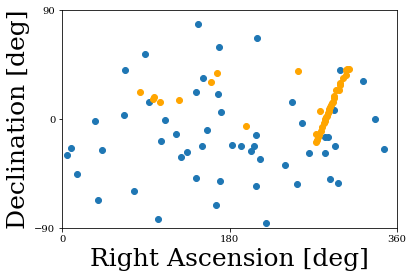

In [21]:
plt.plot(np.degrees(HESEEvents.RA), np.degrees(HESEEvents.DEC),linestyle='none',marker='o')
plt.plot(np.degrees(catalog.RA), np.degrees(catalog.DEC),linestyle='none',marker='o',c='orange')
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.xticks([0,180,360])
plt.yticks([-90,0,90])
plt.xlabel("Right Ascension [deg]")
plt.ylabel("Declination [deg]")

catalog: data/HAWC_Cat.txt
ra  range [83.63, 307.93] deg
dec range [-19.04, 41.76] deg
[('2HWC_J0534+220', 1.45961885,  0.3843215 )
 ('2HWC_J0631+169', 1.71042267,  0.29670597)
 ('2HWC_J0635+180', 1.7249089 ,  0.31503193)
 ('2HWC_J0700+143', 1.83469011,  0.24993115)
 ('2HWC_J0819+157', 2.1813125 ,  0.27558749)
 ('2HWC_J1040+308', 2.79636653,  0.53878314)
 ('2HWC_J1104+381', 2.89916642,  0.66601764)
 ('2HWC_J1309-054', 3.44370915, -0.09581858)
 ('2HWC_J1653+397', 4.42406059,  0.69446651)
 ('2HWC_J1809-190', 4.75532408, -0.33231069)
 ('2HWC_J1812-126', 4.76841405, -0.22060962)
 ('2HWC_J1814-173', 4.77382457, -0.30211649)
 ('2HWC_J1819-150*', 4.79668838, -0.26284659)
 ('2HWC_J1825-134', 4.82513725, -0.23387412)
 ('2HWC_J1829+070', 4.84049615,  0.12269665)
 ('2HWC_J1831-098', 4.84974639, -0.1727876 )
 ('2HWC_J1837-065', 4.8757518 , -0.11484266)
 ('2HWC_J1844-032', 4.90559693, -0.0567232 )
 ('2HWC_J1847-018', 4.92095583, -0.03193953)
 ('2HWC_J1849+001', 4.92863527,  0.00191986)
 ('2HWC_J185

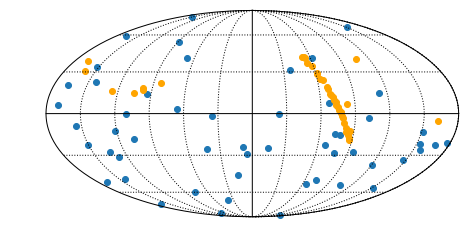

In [14]:
import healpy as hp

path="data/HAWC_Cat.txt"
catalog=loadCatalog(path)
print(catalog)
plt.figure()
NPIX = hp.nside2npix(32)
print(NPIX)
m = np.arange(NPIX)
#hp.mollview(map=None, title=path)
hp.graticule()
hp.projscatter(np.pi/2 - HESEEvents.DEC, HESEEvents.RA)
hp.projscatter(np.pi/2 - catalog.DEC, catalog.RA, c='orange')

In [ ]:
NPIX = hp.nside2npix(32)
print(NPIX)
m = np.arange(NPIX)
hp.mollview(m, title="Mollview image RING")
hp.graticule()